In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
df = pd.read_csv(r'finalTrain.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [6]:
df.dtypes

ID                              object
Delivery_person_ID              object
Delivery_person_Age            float64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weather_conditions              object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries            float64
Festival                        object
City                            object
Time_taken (min)                 int64
dtype: object

In [7]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [8]:
df.shape

(45584, 20)

In [9]:
# remove non numeric columns
df = df.drop(['ID', 'Delivery_person_ID', 'Order_Date', 'Time_Orderd', 'Time_Order_picked', 'City'], axis = 1)

In [10]:
df

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,Time_taken (min)
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,Snack,motorcycle,3.0,No,46
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,Meal,motorcycle,1.0,No,23
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,Drinks,scooter,1.0,No,21
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,20
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,Snack,scooter,1.0,No,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,30.0,4.8,26.902328,75.794257,26.912328,75.804257,Windy,High,1,Meal,motorcycle,0.0,No,32
45580,21.0,4.6,0.000000,0.000000,0.070000,0.070000,Windy,Jam,0,Buffet,motorcycle,1.0,No,36
45581,30.0,4.9,13.022394,80.242439,13.052394,80.272439,Cloudy,Low,1,Drinks,scooter,0.0,No,16
45582,20.0,4.7,11.001753,76.986241,11.041753,77.026241,Cloudy,High,0,Snack,motorcycle,1.0,No,26


In [11]:
df.dropna()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,Time_taken (min)
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,Snack,motorcycle,3.0,No,46
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,Meal,motorcycle,1.0,No,23
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,Drinks,scooter,1.0,No,21
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,20
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,Snack,scooter,1.0,No,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,30.0,4.8,26.902328,75.794257,26.912328,75.804257,Windy,High,1,Meal,motorcycle,0.0,No,32
45580,21.0,4.6,0.000000,0.000000,0.070000,0.070000,Windy,Jam,0,Buffet,motorcycle,1.0,No,36
45581,30.0,4.9,13.022394,80.242439,13.052394,80.272439,Cloudy,Low,1,Drinks,scooter,0.0,No,16
45582,20.0,4.7,11.001753,76.986241,11.041753,77.026241,Cloudy,High,0,Snack,motorcycle,1.0,No,26


In [12]:
df.isnull().sum()

Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
Time_taken (min)                  0
dtype: int64

In [13]:
df.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'Time_taken (min)'],
      dtype='object')

In [14]:
df['Weather_conditions'].unique()

array(['Fog', 'Stormy', 'Sandstorms', 'Windy', 'Cloudy', 'Sunny', nan],
      dtype=object)

In [15]:
df['Road_traffic_density'].unique()

array(['Jam', 'High', 'Medium', 'Low', nan], dtype=object)

In [16]:
df['Type_of_order'].unique()

array(['Snack', 'Meal', 'Drinks', 'Buffet'], dtype=object)

In [17]:
df['Type_of_vehicle'].unique()

array(['motorcycle', 'scooter', 'electric_scooter', 'bicycle'],
      dtype=object)

In [18]:
df['Festival'].unique()

array(['No', 'Yes', nan], dtype=object)

In [19]:
df = pd.get_dummies(df, columns = ['Weather_conditions', 'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 'Festival'])
df

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min),Weather_conditions_Cloudy,...,Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_bicycle,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,Festival_No,Festival_Yes
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2,3.0,46,0,...,0,0,0,1,0,0,1,0,1,0
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,1,1.0,23,0,...,0,0,1,0,0,0,1,0,1,0
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,1,1.0,21,0,...,0,1,0,0,0,0,0,1,1,0
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,0,0.0,20,0,...,1,0,0,0,0,0,1,0,1,0
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,1,1.0,41,0,...,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,30.0,4.8,26.902328,75.794257,26.912328,75.804257,1,0.0,32,0,...,0,0,1,0,0,0,1,0,1,0
45580,21.0,4.6,0.000000,0.000000,0.070000,0.070000,0,1.0,36,0,...,1,0,0,0,0,0,1,0,1,0
45581,30.0,4.9,13.022394,80.242439,13.052394,80.272439,1,0.0,16,1,...,0,1,0,0,0,0,0,1,1,0
45582,20.0,4.7,11.001753,76.986241,11.041753,77.026241,0,1.0,26,1,...,0,0,0,1,0,0,1,0,1,0


In [20]:
df.isnull().sum()

Delivery_person_Age                 1854
Delivery_person_Ratings             1908
Restaurant_latitude                    0
Restaurant_longitude                   0
Delivery_location_latitude             0
Delivery_location_longitude            0
Vehicle_condition                      0
multiple_deliveries                  993
Time_taken (min)                       0
Weather_conditions_Cloudy              0
Weather_conditions_Fog                 0
Weather_conditions_Sandstorms          0
Weather_conditions_Stormy              0
Weather_conditions_Sunny               0
Weather_conditions_Windy               0
Road_traffic_density_High              0
Road_traffic_density_Jam               0
Road_traffic_density_Low               0
Road_traffic_density_Medium            0
Type_of_order_Buffet                   0
Type_of_order_Drinks                   0
Type_of_order_Meal                     0
Type_of_order_Snack                    0
Type_of_vehicle_bicycle                0
Type_of_vehicle_

In [21]:
mean = df['Delivery_person_Age'].mean()
df['Delivery_person_Age'] = df['Delivery_person_Age'].fillna(mean)
df['Delivery_person_Age'].unique()

array([36.        , 21.        , 23.        , 34.        , 24.        ,
       29.        , 35.        , 33.        , 25.        , 31.        ,
       37.        , 27.        , 32.        , 26.        , 38.        ,
       20.        , 22.        , 29.56691059, 28.        , 39.        ,
       30.        , 15.        , 50.        ])

In [22]:
mean = df['Delivery_person_Ratings'].mean()
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].fillna(mean)
df['Delivery_person_Ratings'].unique()

array([4.2      , 4.7      , 4.3      , 4.5      , 4.       , 4.9      ,
       4.1      , 5.       , 4.8      , 3.5      , 4.6      , 4.6337737,
       4.4      , 3.8      , 3.9      , 3.7      , 2.6      , 2.5      ,
       3.6      , 3.1      , 2.7      , 1.       , 3.2      , 3.3      ,
       6.       , 3.4      , 2.8      , 2.9      , 3.       ])

In [23]:
mean = df['multiple_deliveries'].mean()
df['multiple_deliveries'] = df['multiple_deliveries'].fillna(mean)
df['multiple_deliveries'].unique()

array([3.        , 1.        , 0.        , 0.74463457, 2.        ])

In [24]:
X = df.drop('Time_taken (min)', axis = 1)
X

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Weather_conditions_Cloudy,Weather_conditions_Fog,...,Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_bicycle,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,Festival_No,Festival_Yes
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2,3.0,0,1,...,0,0,0,1,0,0,1,0,1,0
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,1,1.0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,1,1.0,0,0,...,0,1,0,0,0,0,0,1,1,0
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,0,0.0,0,0,...,1,0,0,0,0,0,1,0,1,0
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,1,1.0,0,1,...,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,30.0,4.8,26.902328,75.794257,26.912328,75.804257,1,0.0,0,0,...,0,0,1,0,0,0,1,0,1,0
45580,21.0,4.6,0.000000,0.000000,0.070000,0.070000,0,1.0,0,0,...,1,0,0,0,0,0,1,0,1,0
45581,30.0,4.9,13.022394,80.242439,13.052394,80.272439,1,0.0,1,0,...,0,1,0,0,0,0,0,1,1,0
45582,20.0,4.7,11.001753,76.986241,11.041753,77.026241,0,1.0,1,0,...,0,0,0,1,0,0,1,0,1,0


In [25]:
y = df['Time_taken (min)']
y

0        46
1        23
2        21
3        20
4        41
         ..
45579    32
45580    36
45581    16
45582    26
45583    36
Name: Time_taken (min), Length: 45584, dtype: int64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [27]:
models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Linear Regression': LinearRegression(),
}

In [28]:
params = {
   'Decision Tree': {'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [2, 4, 6, 8, 10]},
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [2, 4, 6, 8, 10]},
    'Linear Regression': {'normalize': [True, False]},
}

In [29]:
for name, model in models.items():
    param_grid = params[name]
    if name == 'Linear Regression':
        param_grid.pop('normalize', None)
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    print(f'{name} MAE: {mae:.2f} | MSE: {mse:.2f} | RMSE: {rmse:.2f} | R2 Score: {r2:.2f}')

Decision Tree MAE: 4.05 | MSE: 26.89 | RMSE: 5.19 | R2 Score: 0.70
Random Forest MAE: 4.01 | MSE: 25.97 | RMSE: 5.10 | R2 Score: 0.71
Linear Regression MAE: 5.03 | MSE: 39.99 | RMSE: 6.32 | R2 Score: 0.55


In [30]:
# Visulation
# Fit the best model on the entire dataset
best_model.fit(X, y)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

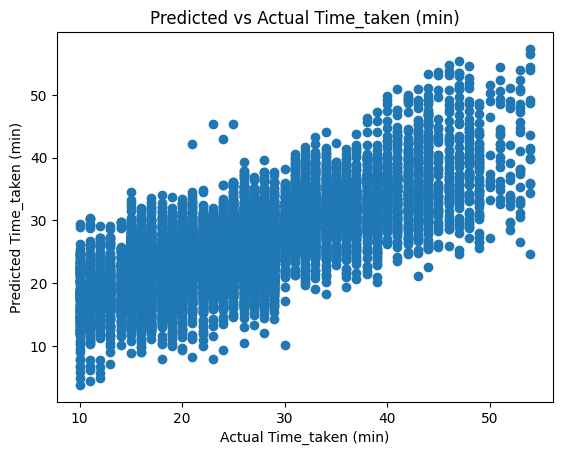

In [31]:
# Create a scatter plot of predicted versus actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Time_taken (min)')
plt.ylabel('Predicted Time_taken (min)')
plt.title('Predicted vs Actual Time_taken (min)')
plt.show()

In [32]:
df

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min),Weather_conditions_Cloudy,...,Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_bicycle,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,Festival_No,Festival_Yes
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2,3.0,46,0,...,0,0,0,1,0,0,1,0,1,0
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,1,1.0,23,0,...,0,0,1,0,0,0,1,0,1,0
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,1,1.0,21,0,...,0,1,0,0,0,0,0,1,1,0
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,0,0.0,20,0,...,1,0,0,0,0,0,1,0,1,0
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,1,1.0,41,0,...,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,30.0,4.8,26.902328,75.794257,26.912328,75.804257,1,0.0,32,0,...,0,0,1,0,0,0,1,0,1,0
45580,21.0,4.6,0.000000,0.000000,0.070000,0.070000,0,1.0,36,0,...,1,0,0,0,0,0,1,0,1,0
45581,30.0,4.9,13.022394,80.242439,13.052394,80.272439,1,0.0,16,1,...,0,1,0,0,0,0,0,1,1,0
45582,20.0,4.7,11.001753,76.986241,11.041753,77.026241,0,1.0,26,1,...,0,0,0,1,0,0,1,0,1,0


In [33]:
# Checking my code predicting delivery or not

# create a new DataFrame with input features for prediction
new_data = pd.DataFrame({
    'Delivery_person_Age':[36.0],
'Delivery_person_Ratings':[4.2],
'Restaurant_latitude':[30.327968],
'Restaurant_longitude':[78.046106],
'Delivery_location_latitude':[30.397968],
'Delivery_location_longitude':[78.116106],
'Vehicle_condition':[2],
'multiple_deliveries':[3.0],
'Weather_conditions_Cloudy':[0],
'Weather_conditions_Fog':[0], 
'Weather_conditions_Sandstorms':[0],
'Weather_conditions_Stormy':[0], 
'Weather_conditions_Sunny':[1],
'Weather_conditions_Windy':[0], 
'Road_traffic_density_High':[0],
'Road_traffic_density_Jam':[0], 
'Road_traffic_density_Low':[1],
'Road_traffic_density_Medium':[0], 
'Type_of_order_Buffet':[0],
'Type_of_order_Drinks':[0], 
'Type_of_order_Meal':[0],
'Type_of_order_Snack':[1],
'Type_of_vehicle_bicycle':[0],
'Type_of_vehicle_electric_scooter':[0],
'Type_of_vehicle_motorcycle':[1],
'Type_of_vehicle_scooter':[0],
'Festival_No':[1],
'Festival_Yes':[0]
})


In [34]:
delivery_time = best_model.predict(new_data)
print(f"Predicted delivery time: {delivery_time.item():.2f} minutes")

Predicted delivery time: 29.24 minutes


In [35]:
import seaborn as sns

In [36]:
# create correlation matrix
corr = df.corr()

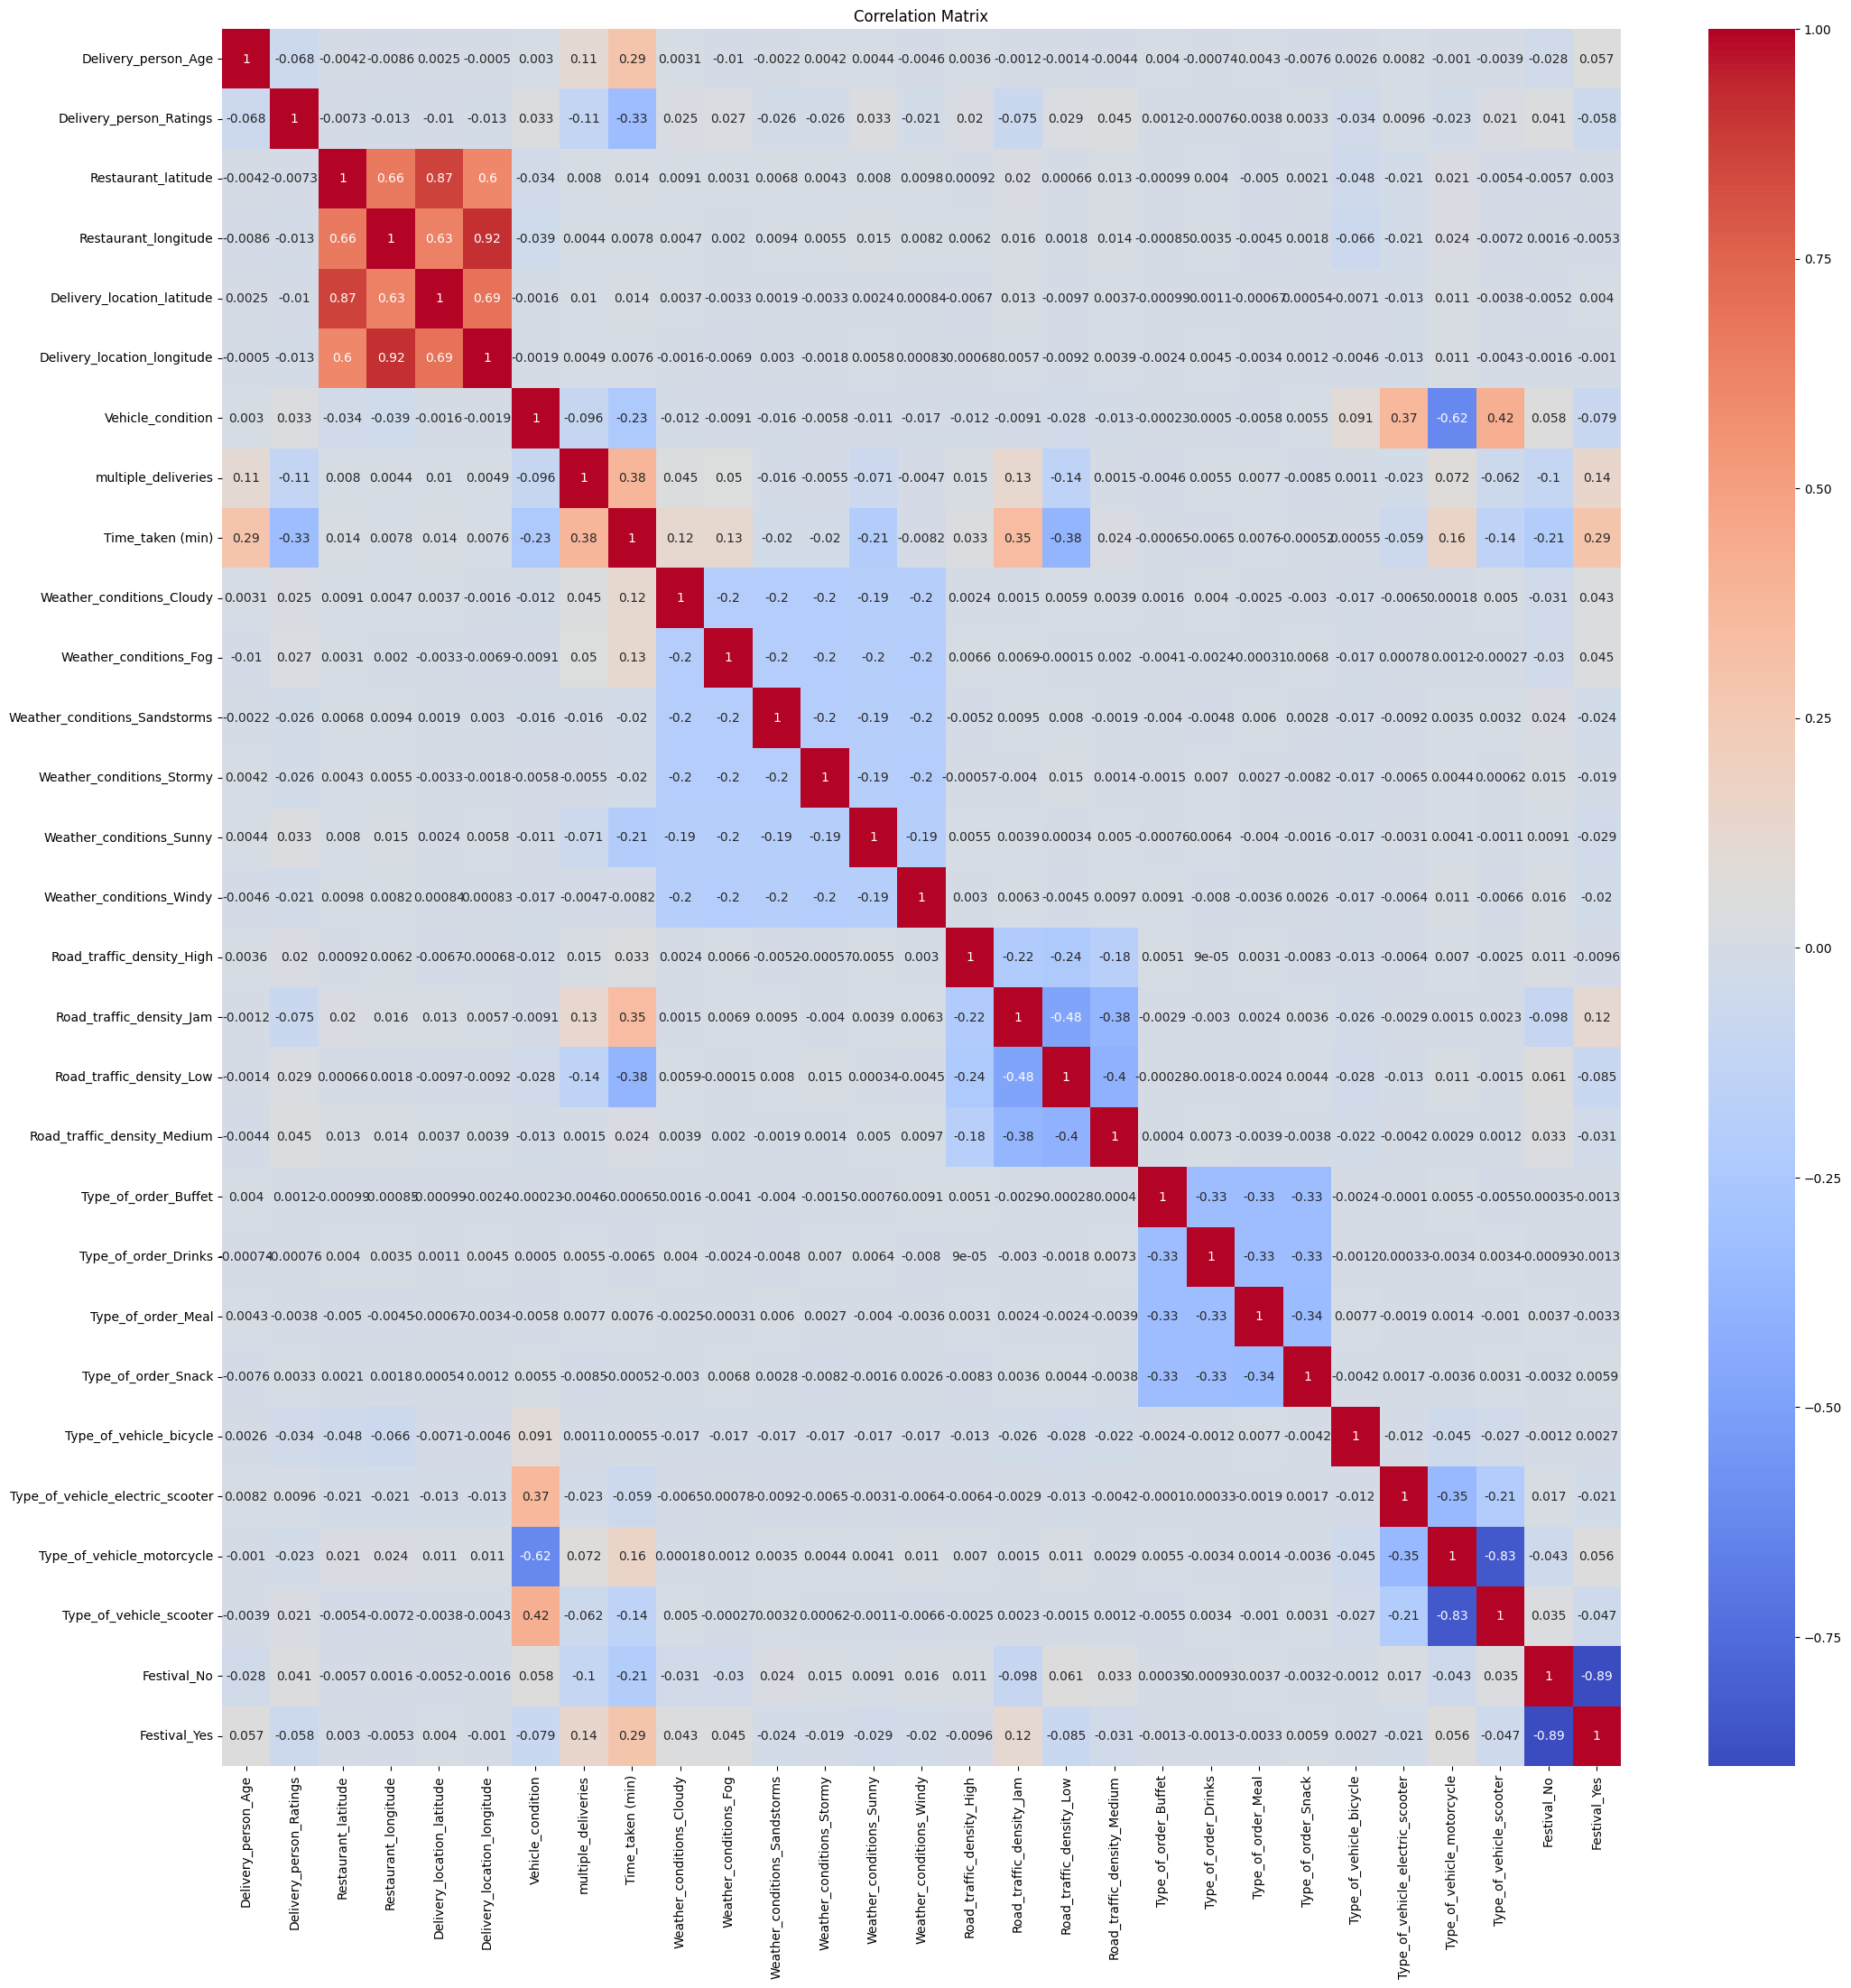

In [37]:
# plot the correlation matrix using a heatmap
plt.figure(figsize = (25,25))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

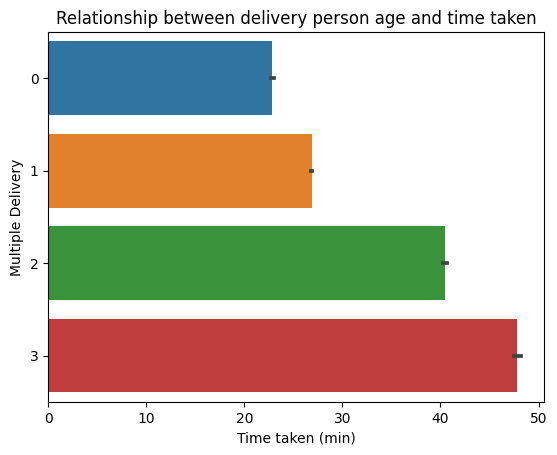

In [38]:
# Line plot
# sort DataFrame by y-axis variable in descending order
df['multiple_deliveries'] = df['multiple_deliveries'].astype(int)
sns.barplot(x = 'Time_taken (min)', y = 'multiple_deliveries' , data = df ,orient='h')
plt.title('Relationship between delivery person age and time taken')
plt.xlabel('Time taken (min)')
plt.ylabel('Multiple Delivery')
plt.show()

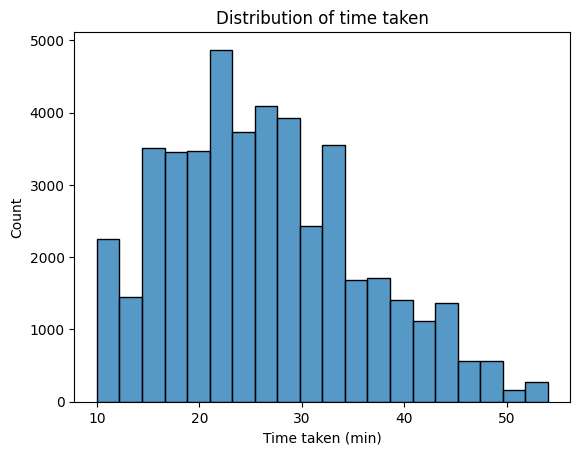

In [39]:
# Histogram
sns.histplot(x='Time_taken (min)', data=df, bins=20)
plt.title('Distribution of time taken')
plt.xlabel('Time taken (min)')
plt.ylabel('Count')
plt.show()

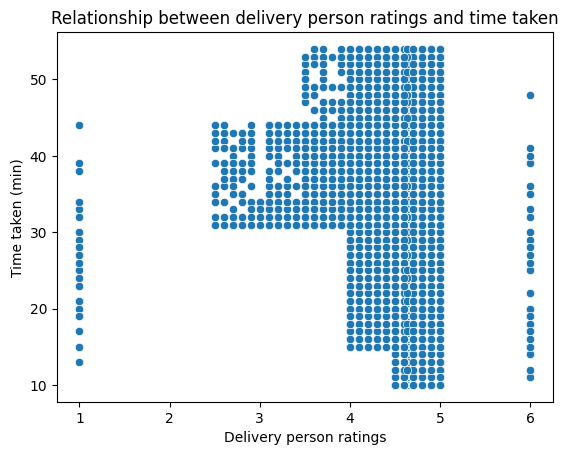

In [40]:
# Scatter plot
sns.scatterplot(x='Delivery_person_Ratings', y='Time_taken (min)', data=df)
plt.title('Relationship between delivery person ratings and time taken')
plt.xlabel('Delivery person ratings')
plt.ylabel('Time taken (min)')
plt.show()